In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv('Decision Tree & Random Forest Problem_ Data Set - loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [10]:
df.duplicated().sum()

0

In [11]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [12]:
corr=df.corr()

<AxesSubplot:>

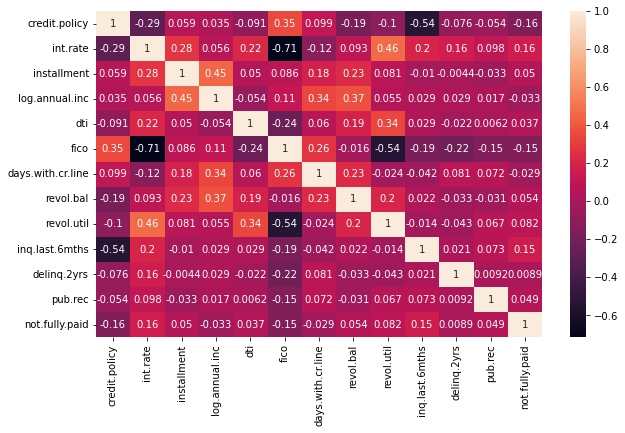

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

Text(0.5, 1.0, 'Target value')

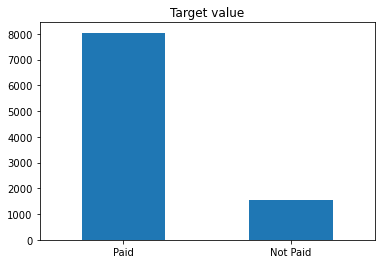

In [14]:
df['not.fully.paid'].value_counts().plot(kind='bar')
#rotation=360 for changing the dir of ticks
plt.xticks(ticks=[0,1],labels=['Paid', 'Not Paid'],rotation=360)
plt.title('Target value')

Text(0.5, 1.0, 'Credit policy counted by loan paid')

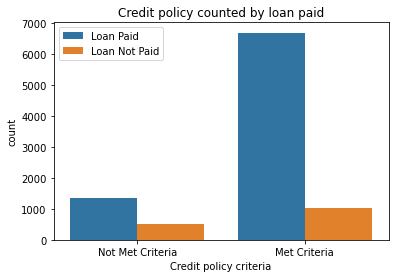

In [15]:
sns.countplot(data=df, x='credit.policy',hue='not.fully.paid')
plt.xlabel('Credit policy criteria')
plt.legend(['Loan Paid','Loan Not Paid'])
plt.xticks(ticks=[1,0],labels=['Met Criteria','Not Met Criteria'])
plt.title('Credit policy counted by loan paid')

Text(0.5, 1.0, 'Purpose of taking loan')

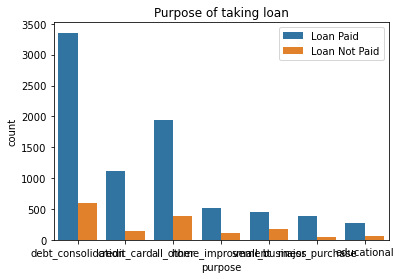

In [16]:
sns.countplot(data=df, x='purpose',hue='not.fully.paid')
plt.legend(['Loan Paid','Loan Not Paid'])
plt.title('Purpose of taking loan')

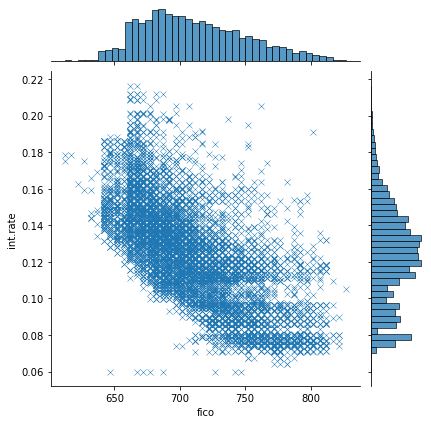

In [17]:
# when the interest rates are lower, people got better FICO scores
sns.jointplot(data=df,x='fico', y='int.rate',marker='x')

In [18]:
#converting char values in purpose to int 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['purpose']=encoder.fit_transform(df['purpose'])
df.head()

#dummy variable or purpose encoder question

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [19]:
X=df.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']

In [20]:
len(X)

9578

In [21]:
len(y)

9578

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
S_X_train = SS.fit_transform(X_train)
S_X_test = SS.fit_transform(X_test)

In [24]:
len(X_train)

7662

In [25]:
len(y_train)

7662

# Decision Tree

In [26]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
#only fit no fit_trainsform lazy learner?--------
model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.3879599484565056, 0.9868421052631579, 'X[0] <= 0.5\ngini = 0.27\nsamples = 7662\nvalue = [6432, 1230]'),
 Text(0.1784303145946577, 0.9605263157894737, 'X[10] <= 6.5\ngini = 0.401\nsamples = 1483\nvalue = [1072, 411]'),
 Text(0.11817386492480075, 0.9342105263157895, 'X[3] <= 282.2\ngini = 0.379\nsamples = 1255\nvalue = [936, 319]'),
 Text(0.03790548821155834, 0.9078947368421053, 'X[5] <= 0.235\ngini = 0.337\nsamples = 759\nvalue = [596, 163]'),
 Text(0.0053356454463600895, 0.881578947368421, 'X[1] <= 2.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.0032013872678160536, 0.8552631578947368, 'X[4] <= 9.372\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.002134258178544036, 0.8289473684210527, 'X[4] <= 8.608\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.001067129089272018, 0.8026315789473685, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.0032013872678160536, 0.8026315789473685, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.004268516357088072, 0.82894

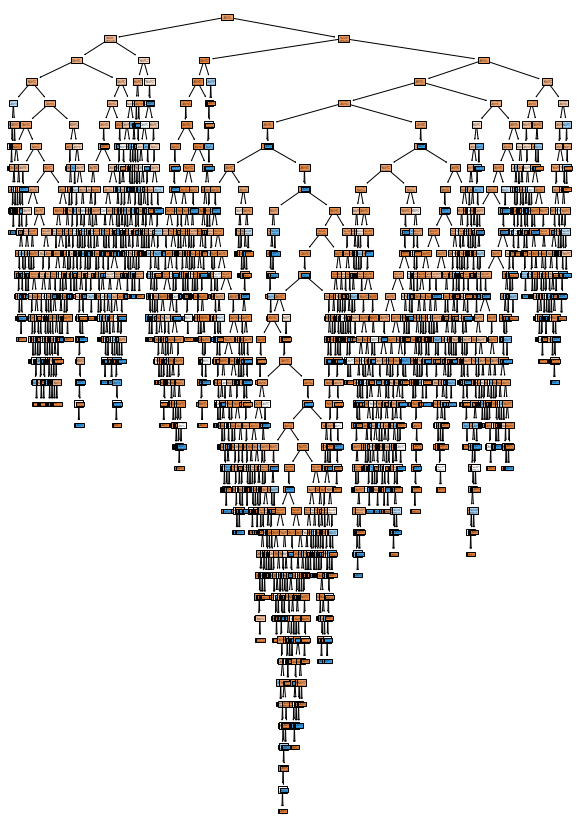

In [25]:
plt.figure(figsize=(10,15))
tree.plot_tree(model,filled = True)

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
len(y_pred)

1916

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [30]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

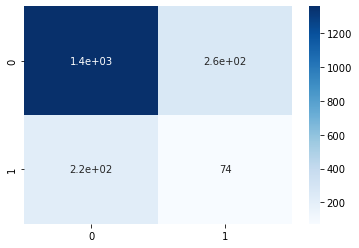

In [31]:
sns.heatmap(cm,annot=True, cmap="Blues")

In [32]:
accuracy_score(y_test,y_pred)

0.7479123173277662

In [33]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.84      0.85      1624\n           1       0.22      0.25      0.23       292\n\n    accuracy                           0.75      1916\n   macro avg       0.54      0.55      0.54      1916\nweighted avg       0.76      0.75      0.76      1916\n'

## Hyperparametor Tuning Decision Tree

In [34]:
param_dict={
    "criterion":['gini','entropy'],
    "max_depth":[1,2,3,4,5,6,7,None]
}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid = GridSearchCV(model,param_grid=param_dict,cv=10,n_jobs=-1)

In [37]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [38]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [39]:
grid.best_score_

0.8380321077338382

In [47]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [48]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
len(y_pred)

1916

In [50]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

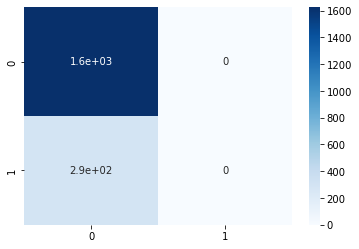

In [51]:
sns.heatmap(cm,annot=True, cmap="Blues")

In [55]:
accuracy_score(y_test,y_pred)

0.8475991649269311

In [56]:
classification_report(y_test,y_pred)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.85      1.00      0.92      1624\n           1       0.00      0.00      0.00       292\n\n    accuracy                           0.85      1916\n   macro avg       0.42      0.50      0.46      1916\nweighted avg       0.72      0.85      0.78      1916\n'

## Model creation using scaled value

In [57]:
model.fit(S_X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [58]:
s_y_pred = model.predict(S_X_test)
s_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
cm = confusion_matrix(y_test,s_y_pred)

<AxesSubplot:>

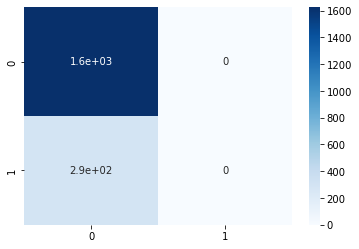

In [60]:
sns.heatmap(cm,annot=True, cmap="Blues")

In [61]:
accuracy_score(y_test,s_y_pred)

0.8475991649269311

In [62]:
classification_report(y_test,y_pred)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.85      1.00      0.92      1624\n           1       0.00      0.00      0.00       292\n\n    accuracy                           0.85      1916\n   macro avg       0.42      0.50      0.46      1916\nweighted avg       0.72      0.85      0.78      1916\n'

# Random Forest 

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()

In [65]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
rf_predict = rf.predict(X_test)
rf_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
cm = confusion_matrix(y_test,rf_predict)

<AxesSubplot:>

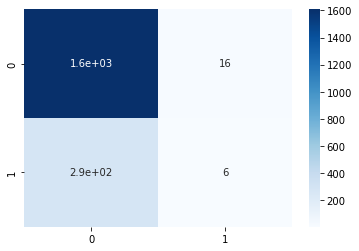

In [68]:
sns.heatmap(cm,annot=True, cmap="Blues")

In [69]:
accuracy_score(y_test,rf_predict)

0.8423799582463466

In [70]:
classification_report(y_test,rf_predict)

'              precision    recall  f1-score   support\n\n           0       0.85      0.99      0.91      1624\n           1       0.27      0.02      0.04       292\n\n    accuracy                           0.84      1916\n   macro avg       0.56      0.51      0.48      1916\nweighted avg       0.76      0.84      0.78      1916\n'

## Hyper parametor tuning for Random Forest

In [71]:
# param_dict={
#     "criterion":['gini','entropy'],
#     "max_depth":[1,2,3,4,5,6,7,None],
#     'n_estimators':[10,20,30,40,50,60,70,80,90,100],
#     'min_samples_split':[1,2,3,4,5,6,7,8,9,10],
#     'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
#     'min_weight_fraction_leaf':[0.0],
#     'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10],
#     'min_impurity_decrease':[0.0],
#     'random_state':[1,2,3,4,5,6,7,8,9,10],
#     'verbose':[1,2,3,4,5,6,7,8,9,10],
#     'ccp_alpha':[0.0],
# }
param_dict={
    "criterion":['gini','entropy'],
    "max_depth":[1,2,3,4,5,6,7,None]
}

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
grid = GridSearchCV(rf,param_grid=param_dict,cv=10,n_jobs=-1)

In [74]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [75]:
grid.best_estimator_

RandomForestClassifier(max_depth=1)

In [77]:
grid.best_score_

0.8380319375274459

In [78]:
rf = RandomForestClassifier(max_depth=1)

In [82]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=1)

In [83]:
rf_predict = rf.predict(X_test)
rf_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
cm = confusion_matrix(y_test,rf_predict)

<AxesSubplot:>

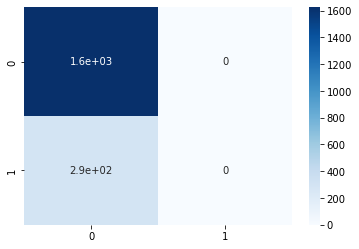

In [85]:
sns.heatmap(cm,annot=True, cmap="Blues")

In [86]:
accuracy_score(y_test,rf_predict)

0.8475991649269311

In [87]:
classification_report(y_test,rf_predict)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.85      1.00      0.92      1624\n           1       0.00      0.00      0.00       292\n\n    accuracy                           0.85      1916\n   macro avg       0.42      0.50      0.46      1916\nweighted avg       0.72      0.85      0.78      1916\n'